<a href="https://colab.research.google.com/github/LK920/tesorflow/blob/master/tf09_RNN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
날짜 : 20/08/20
이름 : 강래구
내용 : 딥러닝 RNN 실습하기
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

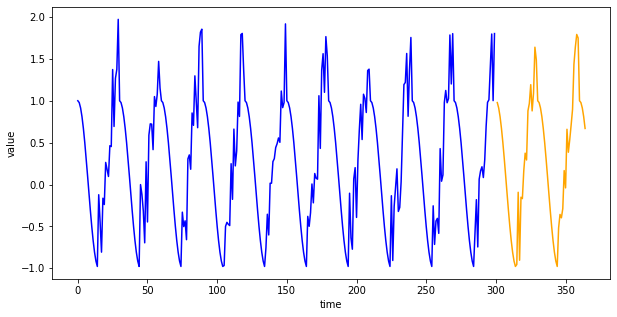

In [2]:
#시계열 데이터 만들기
time = np.arange(365)
month_time = (time % 30) / 30

time_series = np.where(month_time <0.5,
                       np.cos(2*np.pi * month_time),
                       np.cos(2*np.pi * month_time)+np.random.rand(365)) #where 조건함수
time_series

plt.figure(figsize=(10,5))
plt.xlabel('time')
plt.ylabel('value')
#학습데이터
plt.plot(np.arange(0,300), time_series[:300], color='blue')
#검증데이터
plt.plot(np.arange(301,365), time_series[301:], color='orange')

In [3]:
#RNN 학습을 위한 데이터 전처리 (365개에서 300개는 학습 65개는 검증데이터로 분리),1차원데이터를 2차원으로 바꿔야한다.
def make_sequence(time_series, n):
    train_data, train_label = [],[]
    
    for i in range(len(time_series)):
        t = time_series[i:(i+n)]
        
        if (i+n) < len(time_series):
            train_data.append(t)
            train_label.append(time_series[i+n])
        else:
            break
    return np.array(train_data), np.array(train_label)

n= 10
train_data, train_label = make_sequence(time_series, n)

train_data = train_data.reshape(-1, n, 1) #reshape구조를 바꾼다, -1은 오토
train_label = train_label.reshape(-1, 1)



#학습데이터
_train_data = train_data[:300]
_train_label = train_label[:300]

#테스트데이터
_test_data = train_data[300:]
_test_label = train_label[300:]

print(_train_data.shape)
print(_test_label.shape)

#데이터 이해하기
test_arr = np.arange(100) #0~99까지

a, b = make_sequence(test_arr, 10)

for i in range(10):
    print(a[i], '--->', b[i])


(300, 10, 1)
(55, 1)
[0 1 2 3 4 5 6 7 8 9] ---> 10
[ 1  2  3  4  5  6  7  8  9 10] ---> 11
[ 2  3  4  5  6  7  8  9 10 11] ---> 12
[ 3  4  5  6  7  8  9 10 11 12] ---> 13
[ 4  5  6  7  8  9 10 11 12 13] ---> 14
[ 5  6  7  8  9 10 11 12 13 14] ---> 15
[ 6  7  8  9 10 11 12 13 14 15] ---> 16
[ 7  8  9 10 11 12 13 14 15 16] ---> 17
[ 8  9 10 11 12 13 14 15 16 17] ---> 18
[ 9 10 11 12 13 14 15 16 17 18] ---> 19


In [4]:
#모델 구성하기
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(SimpleRNN(units=32, activation='tanh', input_shape=(10,1)))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [5]:
#모델 설정하기
model.compile(optimizer='adam',
             loss='mse',
             metrics=['acc'])

In [6]:
#모델 학습하기
model.fit(_train_data, _train_label, epochs=100, batch_size=16)

Epoch 1/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6827 - acc: 0.0067
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1183 - acc: 0.0333
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1060 - acc: 0.0333
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0916 - acc: 0.0333
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0835 - acc: 0.0333
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0798 - acc: 0.0333
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0768 - acc: 0.0333
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0743 - acc: 0.0333
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0702 - acc: 0.0333
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0682 - acc: 0.0333
Epoch 11/100
19/19 [==============================] - 0s 2m

[300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335
 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353
 354]


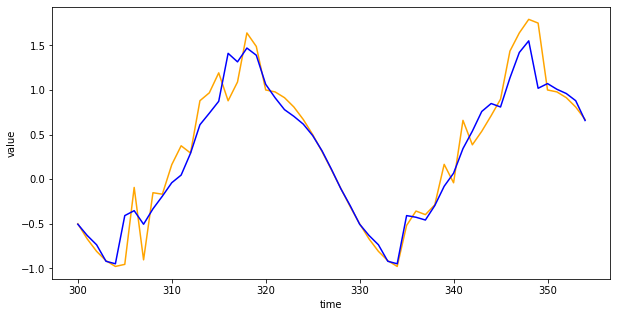

In [7]:
#예측하기
result = model.predict(_test_data)

result_range = np.arange(len(_train_label), len(_train_label)+len(result))
print(result_range)

plt.figure(figsize=(10,5))
plt.xlabel('time')
plt.ylabel('value')

plt.plot(result_range, _test_label.reshape(-1), color='orange')
plt.plot(result_range, result.reshape(-1), color='blue')